In [12]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [16]:
# Assistant
# Importing the pandas library for data manipulation and analysis
import pandas as pd 

# Importing the numpy library for numerical operations
import numpy as np

# Importing the matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for enhanced data visualization
import seaborn as sns

# Reading the CSV file 'Customer Churn.csv' into a DataFrame
df = pd.read_csv('Customer Churn.csv')

# Displaying the DataFrame to visualize its contents
df. head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#  replacing blanks with 0  as tenure is 0 and no total charges are recorded

df["TotalCharges"] =df ["TotalCharges"]. replace ("","0")
df["TotalCharges"] =df ["TotalCharges"]. astype ("float")


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.isnull().sum().sum()

0

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [40]:
# check for duplicates based on unique column
df["customerID"].duplicated().sum()

0

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:

def conv (value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df ["SeniorCitizen"]. apply(conv)

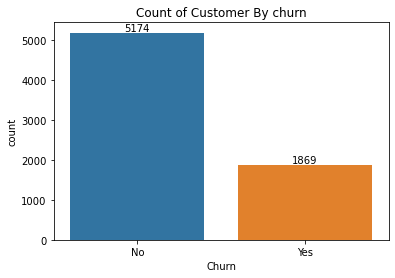

In [96]:
# Create a count plot for the 'Churn' column in the DataFrame 'df'
ax = sns.countplot(x = "Churn", data = df)

# Add labels to the bars in the count plot for better readability
ax.bar_label(ax.containers[0])

# Set the title of the plot to indicate what the data represents
plt.title("Count of Customer By churn")

# Display the plot
plt.show()

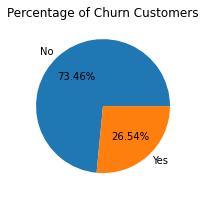

In [98]:
# Create a new figure with a specified size of 3 inches wide and 4 inches tall
plt.figure(figsize=(3,4))

# Group the DataFrame by the 'Churn' column and count the occurrences of each group
gb = df.groupby("Churn").agg({'Churn': "count"})

# Create a pie chart using the counts of churned and non-churned customers
# Set the labels to the index of the grouped DataFrame and format the percentage display
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")

# Set the title of the pie chart
plt.title("Percentage of Churn Customers")

# Display the pie chart
plt.show()

# from given pie chart we can conclude that 26.54% of our customers have churned out
# now lets explore the reson behind it 

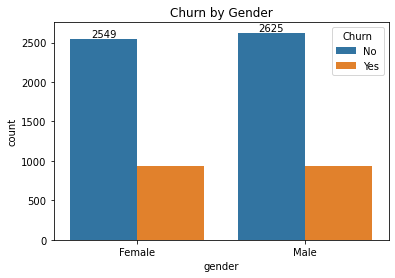

In [110]:
ax= sns.countplot(x="gender", data =df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

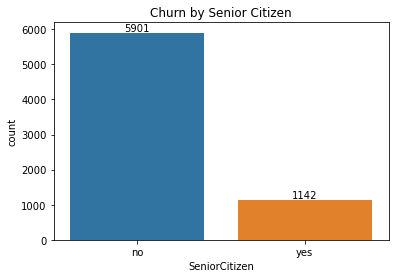

In [116]:
ax= sns.countplot(x="SeniorCitizen", data =df)
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Citizen")
plt.show()

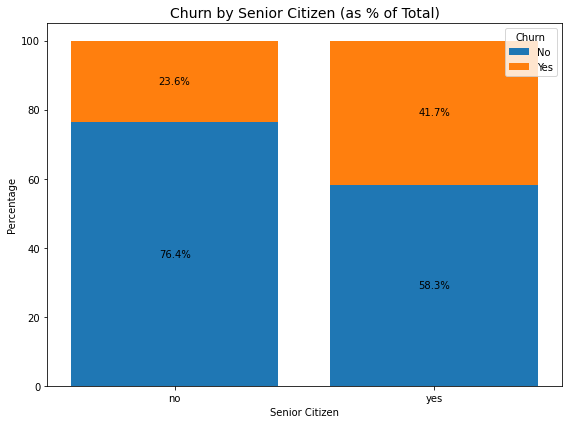

In [114]:
# Calculate counts and percentages
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
grouped_percentage = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bottom = None
for col in grouped_percentage.columns:
    ax.bar(grouped_percentage.index, grouped_percentage[col], bottom=bottom, label=col)
    bottom = (grouped_percentage[col] if bottom is None else bottom + grouped_percentage[col])

# Add percentage labels to each bar segment
for container in ax.containers:
    labels = [f"{v.get_height():.1f}%" for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

# Chart formatting
ax.set_title("Churn by Senior Citizen (as % of Total)", fontsize=14)
ax.set_ylabel("Percentage")
ax.set_xlabel("Senior Citizen")
ax.legend(title="Churn")
plt.tight_layout()
plt.show()

# Comparative a greater percentage of people in senior citizen category have churned

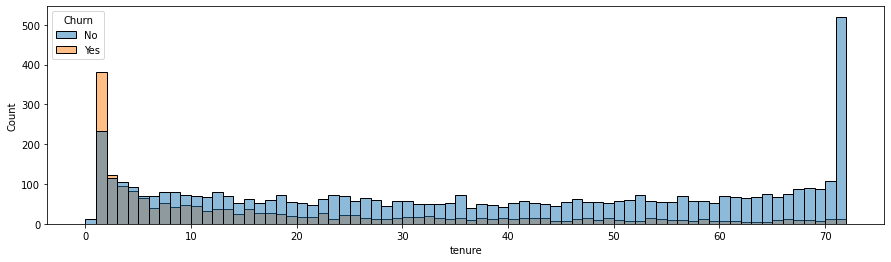

In [128]:
plt.figure ( figsize =(15,4))
sns.histplot (x="tenure", data = df, bins= 72, hue = "Churn")
plt.show()

# People who have used our services for a long time have stayed and people who havw used our services for 1 or 2 months have churned.

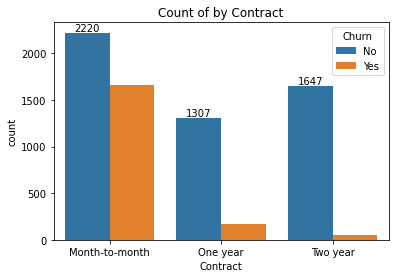

In [138]:
ax= sns.countplot(x="Contract", data =df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of by Contract")
plt.show()

# people who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

In [143]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

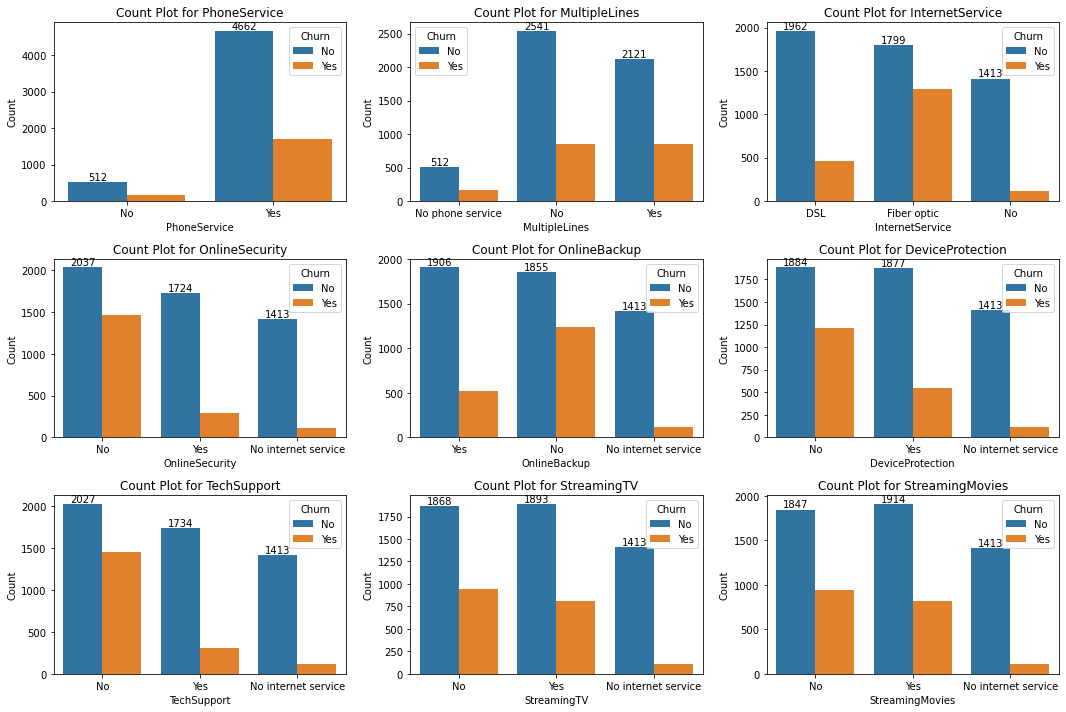

In [147]:
# List of columns for which to create count plots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots (adjust the number of rows and columns based on your preference)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate count plots for each column
for i, column in enumerate(columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax, hue = df["Churn"])
    ax.set_title(f"Count Plot for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.bar_label(ax.containers[0])  # Add counts on the bars

# Remove unused subplot axes (if any)
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Customers with core services like PhoneService or InternetService have lower churn rates. However, optional add-ons such as OnlineSecurity, TechSupport, and DeviceProtection show higher churn among customers who do not use these services. This indicates that the presence of value-added services might play a role in customer retention.

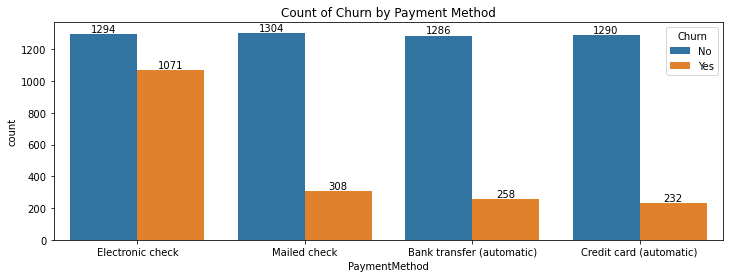

In [162]:
plt.figure(figsize =(12,4))
ax= sns.countplot(x="PaymentMethod", data =df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churn by Payment Method")
plt.show()

#customers using Electronic check as their payment method have a significantly higher churn rate compared to other payment methods